In [1]:
from simulation import solve_simulation
from opt_initial_values import inital_values_gauss
from opt_diags_gen import diags_gen_backwards_euler, diags_gen_forward_euler, diags_gen_crank_nicholson
from analytical import analytical_function, t_good_approx

import config as c

import plots as pl

In [2]:
# good approximation until
print(t_good_approx())

print(t_good_approx()/c.delta_t)

0.013888888888888888
138.88888888888889


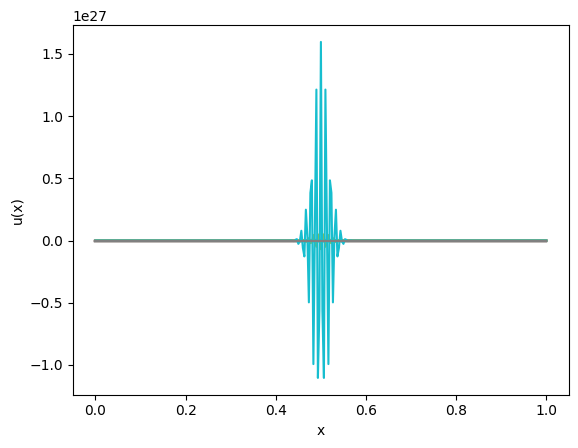

In [3]:
# forward euler
U_fe = solve_simulation(inital_values_gauss,diags_gen_forward_euler)
pl.plot_diff_times(
    U_fe,
    t_diff_times=list(range(15,25)),
    log=False,
    func_t=analytical_function
    )


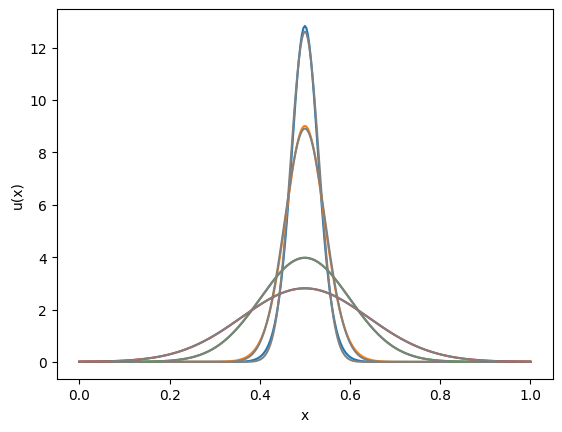

interactive(children=(IntSlider(value=95, description='t', max=199, step=5), Output()), _dom_classes=('widget-…

In [4]:
# forward euler
U_be = solve_simulation(inital_values_gauss,diags_gen_backwards_euler)
pl.plot_diff_times(
    U_be,
    t_diff_times=[5,10,50,99],
    log=False,
    func_t=analytical_function,
    )

pl.sketch(
    U_be,
    t_i_steps=5,
    func_t=analytical_function,
    )

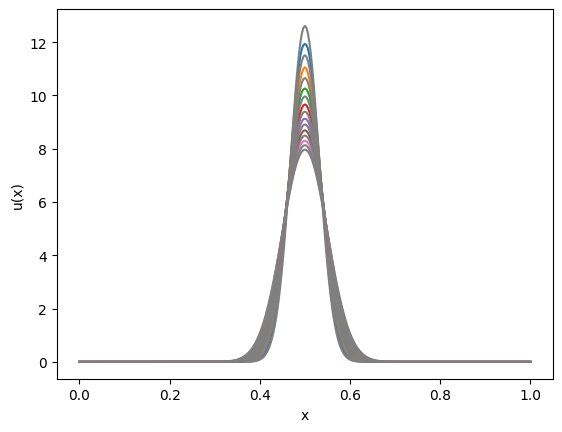

In [5]:
# crank nicholson
U_cn = solve_simulation(inital_values_gauss,diags_gen_crank_nicholson)
pl.plot_diff_times(
    U_cn,
    t_diff_times=list(range(5,13)),
    log=False,
    func_t=analytical_function
    )